In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [84]:
titanic =sns.load_dataset('titanic') #kaggle
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


1.deck컴럼을삭제하고나이(age)의nan데이터를 나이평균값으로채우시요
2.생존자와사망자에대한갯수를구하시요
3.등급별(pclass)생존평균을구하시요
4.SibSp(가족또는친구탑승)의생존평균을구하시요
5.혼자탑승(alone)한인원의생존평균을구하시요
6.성별생존평균을구하시요
7.등급별티켓비용(fare)의평균을 차트로그리시요
8.나이분류컬럼을추가하시요
    1~15(미성년자),15~25(청년),25~35(중년),35~60(장년),60~(노년)으로표시하시요.
9.나이분류를파이차트로표시하시요
10.생존율이가장높은나이분류를구하시요
11.성별,나이분류별,등급(pclass)를멀티인덱스로,평균생존을값으로표시하시요

In [113]:
# 1.deck컴럼을삭제하고 나이(age)의nan데이터를 나이평균값으로채우시요
titanic.drop('deck',axis=1,inplace=True)
titanic.loc[pd.isna(titanic['age']),'age'] = titanic.loc[:,'age'].mean()

In [119]:
pd.isna(titanic).sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [45]:
# 2.생존자와사망자에대한갯수를구하시요
not_survived = titanic.loc[titanic.loc[:,'survived'] == 0,'survived'].count()
survived = titanic.loc[titanic.loc[:,'survived'] == 1,'survived'].count()
print(f'Survived count : {survived} \nNot survived count : {not_survived}')

Survived count : 342 
Not survived count : 549


In [46]:
titanic.groupby('survived').count()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
survived,,,,,,,,,,,,,
0,549,549,424,549,549,549,549,549,549,549,549,549,549
1,342,342,290,342,342,342,340,342,342,342,340,342,342


In [134]:
titanic['alive'].value_counts()

no     549
yes    342
Name: alive, dtype: int64

In [146]:
# 3.등급별(pclass)평균생존율을구하시요
titanic.groupby('pclass').mean()['survived']

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

In [148]:
# 4.SibSp(가족또는친구탑승)의생존평균을구하시요
titanic.groupby('sibsp').mean()['survived']

sibsp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: survived, dtype: float64

In [149]:
# 5.혼자탑승(alone)한인원의생존평균을구하시요
titanic.groupby('alone').mean()['survived']

alone
False    0.505650
True     0.303538
Name: survived, dtype: float64

In [150]:
# 6.성별생존평균을구하시요
titanic.groupby('sex').mean()['survived']

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

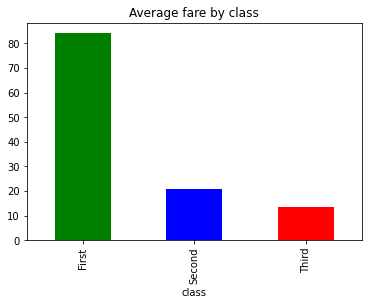

In [244]:
# 7.등급별티켓비용(fare)의평균을 차트로그리시요
titanic.groupby('class').mean()['fare'].plot(kind='bar',color=['g','b','r'],title='Average fare by class')
plt.show()

In [234]:
# 8.나이분류컬럼을추가하시요
#     1~15(미성년자),15~25(청년),25~35(중년),35~60(장년),60~(노년)으로표시하시요.
def age_class(x):
    if (x>=0) and (x<=15):
        return '미성년자'
    elif (x>15) and (x<=25):
        return '청년'
    elif (x>25) and (x<=35):
        return '중년'
    elif (x>35) and (x<=60):
        return '장년'
    else:
        return '노년'

for i , person in enumerate(titanic['age']):
    titanic.loc[i,'age_class'] = age_class(person) 

In [237]:
age_class = titanic['age_class'].value_counts().loc[['미성년자','청년','중년','장년','노년']]
age_class

미성년자     83
청년      218
중년      373
장년      195
노년       22
Name: age_class, dtype: int64

In [231]:
ageMx =int(titanic['age'].max())
titanic['나이분류']=pd.cut( titanic['age'], [0,15,25,35,60,ageMx],
      labels=['미성년자','청년','중년','장년','노년'] )
titanic['나이분류'].value_counts()

중년      373
청년      218
장년      195
미성년자     83
노년       22
Name: 나이분류, dtype: int64

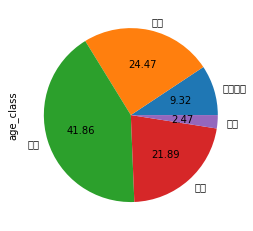

In [242]:
# 9.나이분류를파이차트로표시하시요

age_class.plot(kind='pie',autopct='%.2f')
plt.show()

In [264]:
# 10.생존율이가장높은나이분류를구하시요
titanic.loc[:,['age_class','survived']].groupby('age_class').mean().round(2).idxmax()

survived    미성년자
dtype: object

In [276]:
# 11.성별,나이분류별,등급(pclass)를멀티인덱스로,평균생존을값으로표시하시요
titanic.groupby(['sex','age_class','pclass']).mean()[['survived']]

survived
sex    age_class pclass          
female 노년        1       1.000000
                 3       1.000000
       미성년자      1       0.666667
                 2       1.000000
                 3       0.533333
       장년        1       0.972222
                 2       0.850000
                 3       0.142857
       중년        1       1.000000
                 2       0.925926
                 3       0.562500
       청년        1       0.960000
                 2       0.947368
                 3       0.485714
male   노년        1       0.083333
                 2       0.333333
                 3       0.000000
       미성년자      1       1.000000
                 2       1.000000
                 3       0.321429
       장년        1       0.370370
                 2       0.037037
                 3       0.068182
       중년        1       0.404762
                 2       0.119048
                 3       0.141176
       청년        1       0.363636
                 2       0.037037
                 3       0.108911

In [277]:
titanic.groupby(['sex','나이분류','pclass']).mean()[['survived']]

survived
sex    나이분류 pclass          
female 미성년자 1       0.666667
            2       1.000000
            3       0.533333
       청년   1       0.960000
            2       0.947368
            3       0.485714
       중년   1       1.000000
            2       0.925926
            3       0.562500
       장년   1       0.972222
            2       0.850000
            3       0.142857
       노년   1       1.000000
            2            NaN
            3       1.000000
male   미성년자 1       1.000000
            2       1.000000
            3       0.321429
       청년   1       0.363636
            2       0.037037
            3       0.108911
       중년   1       0.404762
            2       0.119048
            3       0.141176
       장년   1       0.370370
            2       0.037037
            3       0.068182
       노년   1       0.083333
            2       0.333333
            3       0.000000

In [274]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_class,나이분류
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,청년,청년
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,장년,장년
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,중년,중년
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,중년,중년
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,중년,중년
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True,중년,중년
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True,청년,청년
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False,중년,중년
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,중년,중년
